In [57]:
import pickle
from ete3 import Tree
from ete3 import TreeStyle
import numpy as np
import matplotlib.pyplot as plt

In [58]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [59]:
# 1k k run run-20220602_155806-k0px14jf
# 1k run: run-20220602_155801-i8ftkrwq
# "run-20220608_222101-ey5rdpge"
with open("/scratch/ak1774/runs/large_files_jax/run-20220608_222101-ey5rdpge/lineage_data.pickle", "rb") as input_file:
    lineage_data = pickle.load(input_file)
    

In [60]:
lineage_data[:3]

[{'ID': 1,
  'parent_ID': 0,
  'generation_created': 0,
  'lineage_length_before_individual': 1},
 {'ID': 2,
  'parent_ID': 1,
  'generation_created': 1,
  'lineage_length_before_individual': 2},
 {'ID': 3,
  'parent_ID': 2,
  'generation_created': 2,
  'lineage_length_before_individual': 3}]

In [61]:
# we need to transform the lineage data to:
# {parent_id : child_data_list}
child_dict = {}
ID_dict = {}
for data in lineage_data:
    parent_ID = data["parent_ID"]
    ID_dict[data["ID"]] = data
    if parent_ID in child_dict:
        child_dict[parent_ID].append(data)
    else:
        child_dict[parent_ID] = [data]

len(lineage_data)

5000

In [ ]:
def calculate_child_dict(lineage_data):
    child_dict = {}
    ID_dict = {}
    for data in lineage_data:
        parent_ID = data["parent_ID"]
        ID_dict[data["ID"]] = data
        if parent_ID in child_dict:
            child_dict[parent_ID].append(data)
        else:
            child_dict[parent_ID] = [data]
            
    return child_dict

def calculate_lineage_descriptors(lineage_data)
    child_dict = calculate_child_dict(lineage_data)
    
    number_of_child = [len(children) for parent_id,children in child_dict.items()]
    lineage_lengths = [data["lineage_length_before_individual"] for data in lineage_data]
    
    return {
        "mean_num_child" : 
    }
    print("np.mean(number_of_child) ",np.mean(number_of_child))
    print("np.max(number_of_child) ",np.max(number_of_child))

    
    print("np.mean(lineage_lengths) ",np.mean(lineage_lengths))
    print("np.max(lineage_lengths) ",np.max(lineage_lengths))

def calculate_lineage_descriptors_of_alive(alive_individuals):
    

np.mean(number_of_child)  1.2330456226880395
np.max(number_of_child)  23
np.mean(lineage_lengths)  15.306
np.max(lineage_lengths)  35


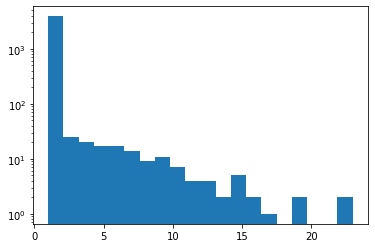

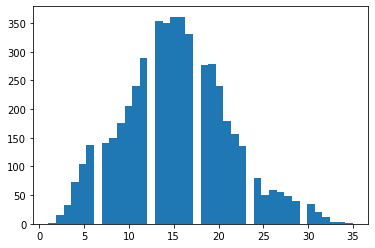

In [68]:
# things I want from lineage data
# - average length of alive lineages 
# - max length of alive lineages
# - max number of children
# - number of parents

# Plots to make:
# - distribution of number of children
# - distribution of lineage length
# - distribution of lineage length of alive

number_of_child = [len(children) for parent_id,children in child_dict.items()]
print("np.mean(number_of_child) ",np.mean(number_of_child))
print("np.max(number_of_child) ",np.max(number_of_child))

lineage_lengths = [data["lineage_length_before_individual"] for data in lineage_data]
print("np.mean(lineage_lengths) ",np.mean(lineage_lengths))
print("np.max(lineage_lengths) ",np.max(lineage_lengths))

plt.hist(number_of_child,bins=20);
plt.yscale('log')
plt.show()

plt.hist(lineage_lengths,bins=40)
plt.show()


In [39]:
len(number_of_child)

39

In [5]:
unrooted_tree = Tree( "(1,2,(3,4));" )
print(unrooted_tree)


   /-1
  |
--|--2
  |
  |   /-3
   \-|
      \-4


In [7]:
# create tree string, this is going to be a recursive function
def create_node_string(node_id):
    if node_id in child_dict:
        # node have children
        node_string = "("
        node_string += ",".join([create_node_string(child["ID"]) for child in child_dict[node_id]])
        node_string += ")"
        return node_string
    else:
        # node does not have children, it is a leaf node
        return str(ID_dict[node_id]["ID"])
root_node_id = 0
tree_string = create_node_string(root_node_id) + ";"
tree_string


'((36,(81,82,83,84,85,121,122,123,124,125,331,332,333,334,335,366,367,368,369,370,511,512,513,514,515,641,642,643,644,645,666,667,668,669,670,716,717,718,719,720,851,852,853,854,855),(101,102,103,104,105,(531,532,533,534,535,721,722,723,724,725,856,857,858,859,860),132,133,134,135,156,157,158,159,160,206,207,208,209,210,(696,697,698,699,700,786,787,788,789,790),292,293,294,295,341,342,343,344,345,376,377,378,379,380,381,382,383,384,385,456,457,458,459,460,526,527,528,529,530,566,567,568,569,570,576,577,578,579,580,586,587,588,589,590,751,752,753,754,755,791,792,793,794,795,826,827,828,829,830,966,967,968,969,970,971,972,973,974,975),39,40),(16,17,18,19,20,26,27,28,29,30,31,32,33,34,35,(56,57,58,59,60,111,112,113,114,115,226,227,228,(506,507,508,509,510,911,912,913,914,915),230,421,422,423,424,425,446,447,448,449,450,671,672,673,674,675,676,677,678,679,680,741,742,743,744,745,816,817,818,819,820,821,822,823,824,825,906,907,908,909,910,951,952,953,954,955,981,982,983,984,985,991,992,993,

In [8]:
my_tree = Tree( tree_string )


In [10]:
#my_tree.render("mytree.png", w=183, units="mm");

In [ ]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
my_tree.show(tree_style=ts)